In [2]:
#Install Pandas Data Reader - library which can actually provide us some specific financial data / help of this library only we're gonna read that specific data
!pip install pandas-datareader

In [3]:
## Installing yahoo finance
!pip install yfinance

In [4]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pmdarima import auto_arima
import pmdarima as pm
from sklearn.linear_model import LinearRegression

In [6]:
#Data collecting from yahoo finance
df_tesla = yf.download('TSLA', start= '2019-01-01', end='2024-09-30')

[*********************100%***********************]  1 of 1 completed


In [7]:
df_tesla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-02,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.356667,22.934000,21.801332,22.797333,105127500


In [8]:
df_tesla.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-09-23,250.000000,250.000000,250.000000,241.919998,242.610001,86927200
2024-09-24,254.270004,254.270004,257.190002,249.050003,254.080002,88491000
2024-09-25,257.019989,257.019989,257.049988,252.279999,252.539993,65034300
2024-09-26,254.220001,254.220001,261.750000,251.529999,260.600006,67142200
2024-09-27,260.459991,260.459991,260.700012,254.119995,257.380005,70988100


EDA part

<Axes: xlabel='Date'>

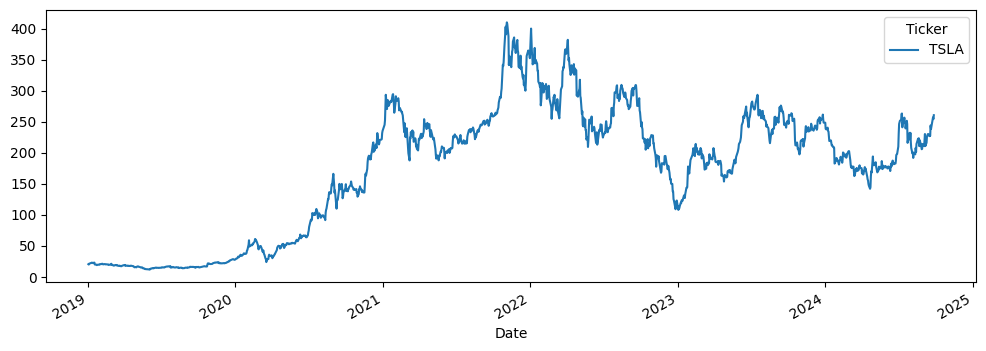

In [9]:
df_tesla['Close'].plot(figsize=(12,4))

In [10]:
#Checking missing values
df_tesla.isnull().sum()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1445 entries, 2019-01-02 to 2024-09-27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1445 non-null   float64
 1   (Close, TSLA)      1445 non-null   float64
 2   (High, TSLA)       1445 non-null   float64
 3   (Low, TSLA)        1445 non-null   float64
 4   (Open, TSLA)       1445 non-null   float64
 5   (Volume, TSLA)     1445 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.0 KB


In [11]:
#Finding number of duplicates
duplicates = df_tesla.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


In [12]:
## Datetime Index
df_tesla.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
               '2024-09-26', '2024-09-27'],
              dtype='datetime64[ns]', name='Date', length=1445, freq=None)

In [13]:
# df_tesla.reset_index(inplace=True)
# df_tesla

In [14]:
df_tesla.index = pd.to_datetime(df_tesla.index)

In [15]:
# df_tesla.set_index('Date', inplace=True)
# df_tesla

Time Resampling

In [16]:
df_tesla.resample(rule='M').max()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-31,23.153999,23.153999,23.466667,22.943333,23.080667,362262000
2019-02-28,21.423332,21.423332,21.615999,21.041332,21.306000,167758500
2019-03-31,19.652666,19.652666,20.475332,19.459999,20.462667,343671000
2019-04-30,19.454000,19.454000,19.744667,19.144667,19.219999,355810500
2019-05-31,17.022667,17.022667,17.223333,16.566668,17.120001,398206500
...,...,...,...,...,...,...
2024-05-31,186.600006,186.600006,187.559998,182.199997,183.800003,115266500
2024-06-30,197.880005,197.880005,203.199997,195.259995,199.550003,118984100


<Axes: xlabel='Date'>

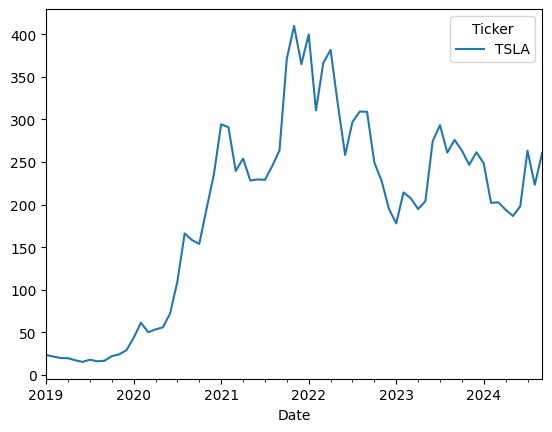

In [17]:
##Monthly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='M').max()['Close'].plot()

<Axes: xlabel='Date'>

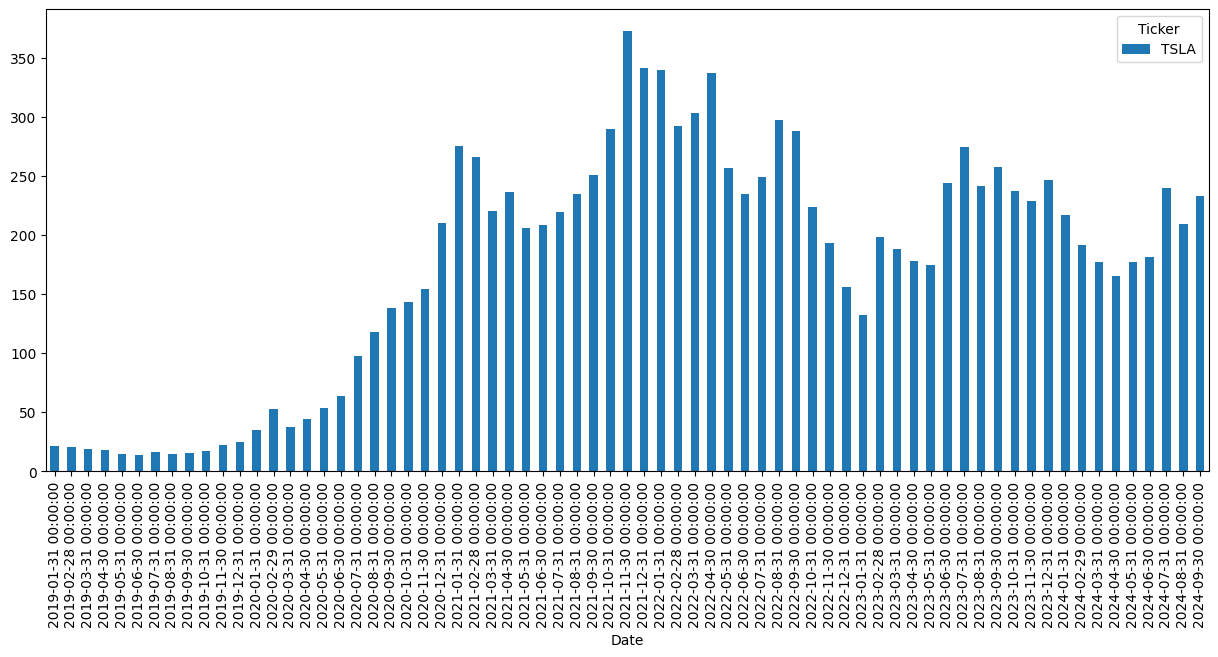

In [18]:
##plotting
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))

In [19]:
df_tesla_resam = df_tesla.resample(rule='M').mean()

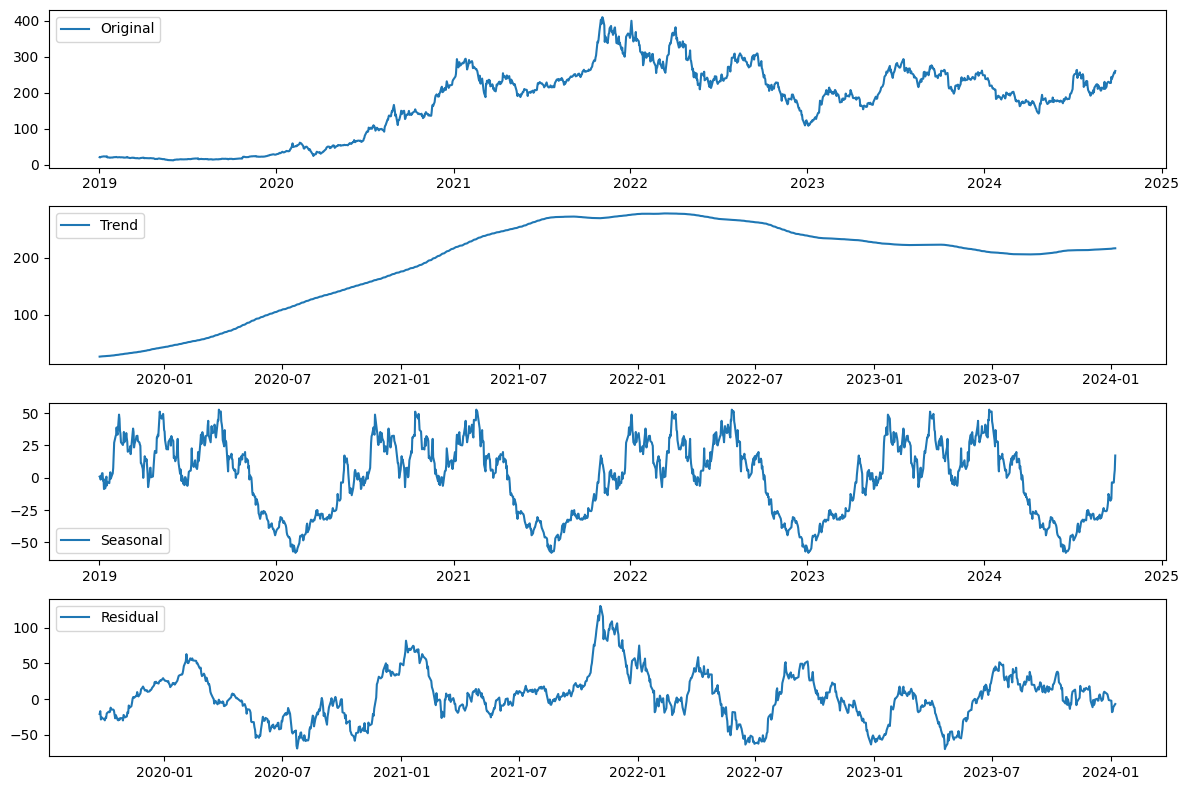

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
decomposition_add  = seasonal_decompose(df_tesla['Close'], model='additive', period=365)

trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_tesla['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_add, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_add, label='Seasonal')
plt.legend(loc='lower left')

plt.subplot(414)
plt.plot(residual_add, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Check Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adf_test = adfuller(df_tesla_resam['Close'])

In [23]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [24]:
adf_test(df_tesla_resam['Close'].dropna())

ADF Statistics: -1.6329848116940309
p- value: 0.46592873302451
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [25]:
## Use Techniques differencing
df_tesla_diff = df_tesla_resam['Close'].diff().dropna()
df_tesla_diff.head()

Ticker,TSLA
Date,
2019-02-28,-0.717725
2019-03-31,-1.998085
2019-04-30,-0.740095
2019-05-31,-3.129350
2019-06-30,-0.399930


In [26]:
adf_test(df_tesla_diff.dropna())

ADF Statistics: -7.220724481011202
p- value: 2.1148559609065778e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

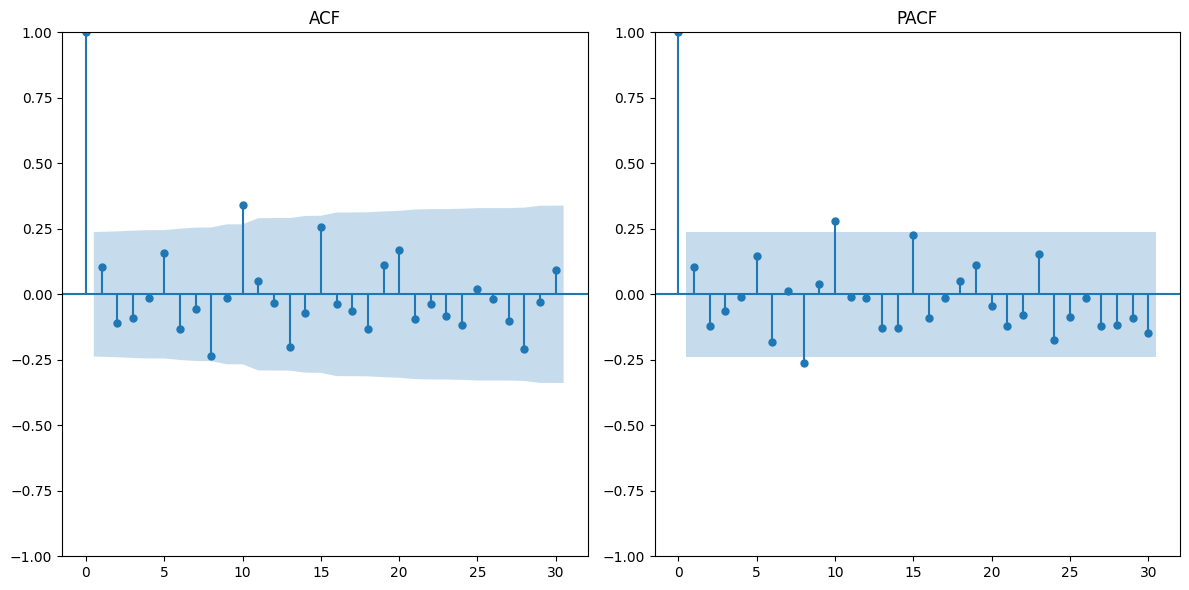

In [28]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_tesla_diff.dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(122)
plot_pacf(df_tesla_diff.dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

Finding the parameters

In [29]:
# Fit auto_arima model
auto_model = pm.auto_arima(df_tesla_diff, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Print model summary
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=658.203, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=659.322, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=659.112, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=659.468, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 4.781 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:                        SARIMAX   Log Likelihood                -328.102
Date:                Mon, 30 Dec 2024   AIC                            658.203
Time:                        20:41:52   BIC                            660.423
Sample:                    02-28-2019   HQIC                           659.083
                        

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Ensure the index is a datetime index for time series analysis
df_tesla_diff.index = pd.to_datetime(df_tesla_diff.index)

# Define the p, d, q parameters
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best parameters and corresponding AIC
best_aic = float("inf")
best_pdq = None

# Grid Search
for param in pdq:
    try:
        model = ARIMA(df_tesla_diff, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
        print(f'ARIMA{param} - AIC:{results.aic}')
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq} with AIC: {best_aic}')

ARIMA(0, 0, 0) - AIC:659.4682910652383
ARIMA(0, 0, 1) - AIC:660.5130713566097
ARIMA(0, 0, 2) - AIC:661.7347715568084
ARIMA(0, 0, 3) - AIC:663.6580474985719
ARIMA(0, 1, 0) - AIC:687.5207440750384
ARIMA(0, 1, 1) - AIC:655.0424606026902
ARIMA(0, 1, 2) - AIC:655.8428315220796
ARIMA(0, 1, 3) - AIC:657.3203496055717
ARIMA(1, 0, 0) - AIC:660.7169317916367
ARIMA(1, 0, 1) - AIC:657.6580839812408
ARIMA(1, 0, 2) - AIC:663.5290029271707


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) - AIC:661.5984122493106
ARIMA(1, 1, 0) - AIC:679.430702283014
ARIMA(1, 1, 1) - AIC:656.0651116235648
ARIMA(1, 1, 2) - AIC:653.1084512525734
ARIMA(1, 1, 3) - AIC:655.1076135055577
ARIMA(2, 0, 0) - AIC:661.6868218027552
ARIMA(2, 0, 1) - AIC:663.5219928072918
ARIMA(2, 0, 2) - AIC:660.8252113782762
ARIMA(2, 0, 3) - AIC:662.1183270419066
ARIMA(2, 1, 0) - AIC:673.865054609234
ARIMA(2, 1, 1) - AIC:657.2638077789803
ARIMA(2, 1, 2) - AIC:655.1046907585617


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:655.632600520841
ARIMA(3, 0, 0) - AIC:663.4535190526319
ARIMA(3, 0, 1) - AIC:665.4525376098051


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:661.8672338252024


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) - AIC:659.2402280436601
ARIMA(3, 1, 0) - AIC:670.489130786909
ARIMA(3, 1, 1) - AIC:659.134101160608
ARIMA(3, 1, 2) - AIC:657.0943049735921
ARIMA(3, 1, 3) - AIC:657.4267155463756
Best ARIMA parameters: (1, 1, 2) with AIC: 653.1084512525734


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                   54
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -257.103
Date:                Mon, 30 Dec 2024   AIC                            522.205
Time:                        21:19:00   BIC                            530.086
Sample:                    02-28-2019   HQIC                           525.236
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6967      0.194     -3.593      0.000      -1.077      -0.317
ma.L1         -0.0560      1.833     -0.031      0.976      -3.650       3.538
ma.L2         -0.9416      1.735     -0.543      0.5

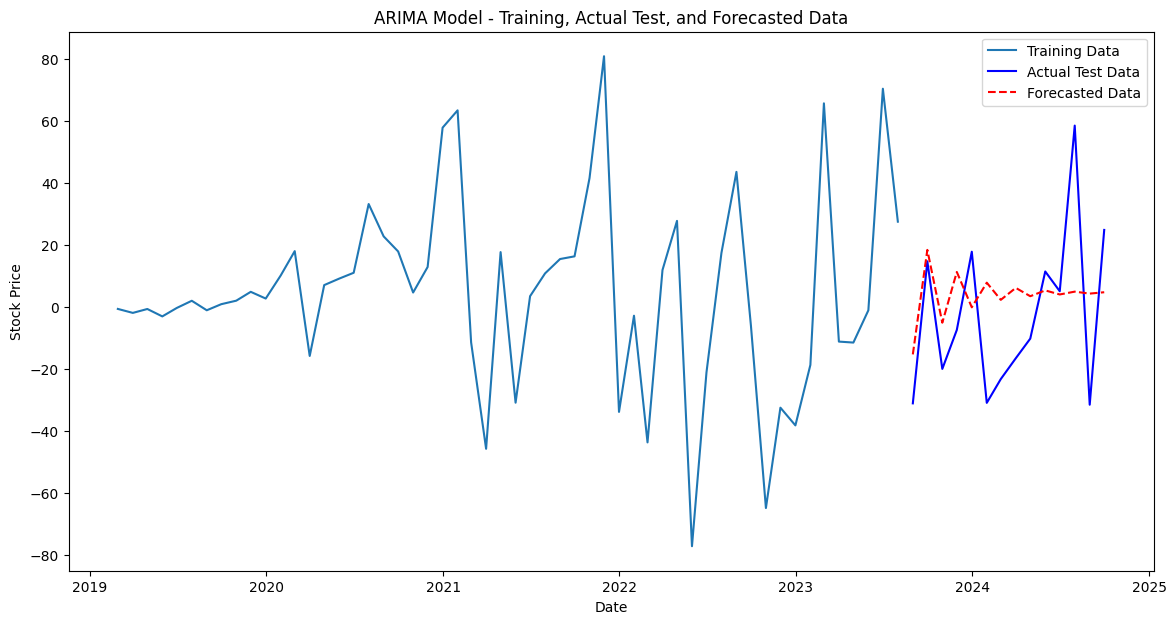

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#Train-Test Split
train_size = int(len(df_tesla_diff) * 0.8)
test_size = len(df_tesla_diff) - train_size
train_data, test_data = df_tesla_diff[:train_size], df_tesla_diff[train_size:]

#Fitting ARIMA Model
# Using Grid search values
model = ARIMA(train_data, order=(1, 1, 2))
arima_result = model.fit()

# Display Model Summary
print(arima_result.summary())

#Forecasting the test data
forecast = arima_result.forecast(steps=len(test_data))

#Evaluating the Model
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='blue')
plt.plot(forecast, label="Forecasted Data", color='red', linestyle="--")
plt.legend()
plt.title("ARIMA Model - Training, Actual Test, and Forecasted Data")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


Epoch 1/50
53/53 - 2s - 36ms/step - loss: 0.2398
Epoch 2/50
53/53 - 0s - 3ms/step - loss: 0.1819
Epoch 3/50
53/53 - 0s - 2ms/step - loss: 0.1368
Epoch 4/50
53/53 - 0s - 3ms/step - loss: 0.1034
Epoch 5/50
53/53 - 0s - 3ms/step - loss: 0.0794
Epoch 6/50
53/53 - 0s - 3ms/step - loss: 0.0644
Epoch 7/50
53/53 - 0s - 3ms/step - loss: 0.0552
Epoch 8/50
53/53 - 0s - 3ms/step - loss: 0.0499
Epoch 9/50
53/53 - 0s - 2ms/step - loss: 0.0460
Epoch 10/50
53/53 - 0s - 3ms/step - loss: 0.0431
Epoch 11/50
53/53 - 0s - 2ms/step - loss: 0.0401
Epoch 12/50
53/53 - 0s - 2ms/step - loss: 0.0371
Epoch 13/50
53/53 - 0s - 3ms/step - loss: 0.0343
Epoch 14/50
53/53 - 0s - 3ms/step - loss: 0.0317
Epoch 15/50
53/53 - 0s - 5ms/step - loss: 0.0293
Epoch 16/50
53/53 - 0s - 6ms/step - loss: 0.0268
Epoch 17/50
53/53 - 0s - 6ms/step - loss: 0.0244
Epoch 18/50
53/53 - 0s - 6ms/step - loss: 0.0222
Epoch 19/50
53/53 - 0s - 6ms/step - loss: 0.0202
Epoch 20/50
53/53 - 0s - 3ms/step - loss: 0.0184
Epoch 21/50
53/53 - 0s - 6ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


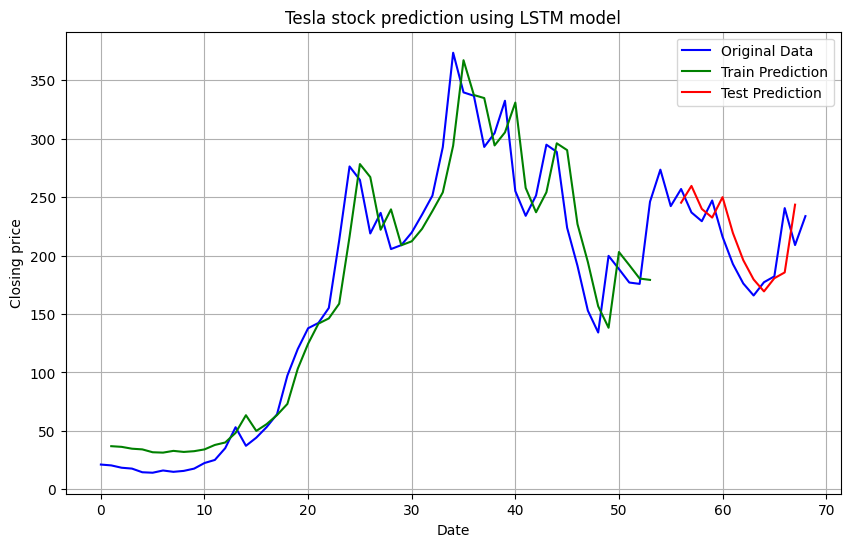

In [66]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

# Data preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_tesla_resam['Close'].values.reshape(-1,1))

# Splitting data into train and test - assuming 80/20
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

# Convert an array of values into a dataset matrix
def prepare_data(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
time_steps = 1
trainX, trainY = prepare_data(train, time_steps)
testX, testY = prepare_data(test, time_steps)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

# Invert predictions
trainPredict = scaler.inverse_transform(model.predict(trainX))
testPredict = scaler.inverse_transform(model.predict(testX))
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict

testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(data_scaled)-1, :] = testPredict

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Prediction', color='green')
plt.plot(testPredictPlot, label='Test Prediction', color='red')
plt.title('Tesla stock prediction using LSTM model')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.grid(True)
plt.show()


#LSTM

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [54]:
# Data preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_tesla_resam['Close'].values.reshape(-1,1))

In [58]:
# Splitting data into train and test - assuming 80/30
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train_lstm, test_lstm = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

In [59]:
# Convert an array of values into a dataset matrix
def prepare_data(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
time_steps = 1
trainX, trainY = prepare_data(train_lstm, time_steps)
testX, testY = prepare_data(test_lstm, time_steps)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [60]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(4, input_shape=(1, time_steps)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
53/53 - 2s - 33ms/step - loss: 0.2009
Epoch 2/50
53/53 - 0s - 3ms/step - loss: 0.1444
Epoch 3/50
53/53 - 0s - 3ms/step - loss: 0.1019
Epoch 4/50
53/53 - 0s - 2ms/step - loss: 0.0745
Epoch 5/50
53/53 - 0s - 3ms/step - loss: 0.0583
Epoch 6/50
53/53 - 0s - 3ms/step - loss: 0.0483
Epoch 7/50
53/53 - 0s - 3ms/step - loss: 0.0424
Epoch 8/50
53/53 - 0s - 2ms/step - loss: 0.0382
Epoch 9/50
53/53 - 0s - 3ms/step - loss: 0.0349
Epoch 10/50
53/53 - 0s - 5ms/step - loss: 0.0319
Epoch 11/50
53/53 - 0s - 3ms/step - loss: 0.0292
Epoch 12/50
53/53 - 0s - 6ms/step - loss: 0.0266
Epoch 13/50
53/53 - 0s - 5ms/step - loss: 0.0239
Epoch 14/50
53/53 - 0s - 6ms/step - loss: 0.0218
Epoch 15/50
53/53 - 0s - 6ms/step - loss: 0.0195
Epoch 16/50
53/53 - 0s - 5ms/step - loss: 0.0175
Epoch 17/50
53/53 - 0s - 3ms/step - loss: 0.0161
Epoch 18/50
53/53 - 0s - 5ms/step - loss: 0.0143
Epoch 19/50
53/53 - 0s - 5ms/step - loss: 0.0130
Epoch 20/50
53/53 - 0s - 3ms/step - loss: 0.0117
Epoch 21/50
53/53 - 0s - 2ms

In [61]:
# Invert predictions
trainPredict = scaler.inverse_transform(model_lstm.predict(trainX))
testPredict = scaler.inverse_transform(model_lstm.predict(testX))
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [62]:
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict

In [63]:
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(data_scaled)-1, :] = testPredict

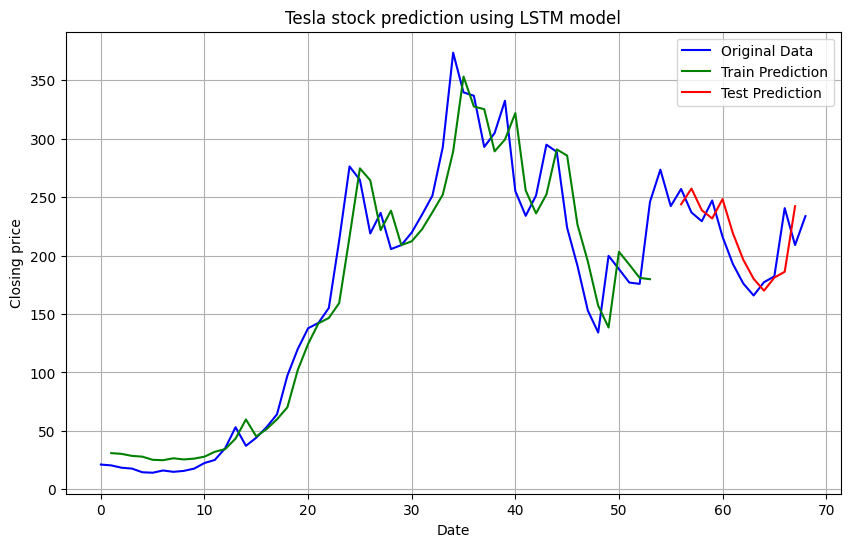

In [65]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Prediction', color='green')
plt.plot(testPredictPlot, label='Test Prediction', color='red')
plt.title('Tesla stock prediction using LSTM model')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.grid(True)
plt.show()